# Student Performance Indicator
## Life cycle of Machine learning Project
  *Understanding the Problem Statement
  *Data Collection
  *Data Checks to perform
  *Exploratory data analysis
  *Data Pre-Processing
  *Model Training
  *Choose best model

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.duplicated().any()

np.False_

In [8]:
df.shape

(1000, 8)

In [9]:
df.isna().any()

gender                         False
race_ethnicity                 False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

In [11]:
print(df.race_ethnicity.unique())
print(df.parental_level_of_education.unique())
print(df.lunch.unique())
print(df.test_preparation_course.unique())


['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(' We have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print (' we have {} categorical features:{}'.format(len(categorical_features),categorical_features))

 We have 3 numerical features:['math_score', 'reading_score', 'writing_score']
 we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['total'] = df.math_score + df.reading_score + df.writing_score
df['average'] = df.total/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading = df[df['reading_score'] == 100]['average'].count()
writing = df[df['writing_score'] == 100]['average'].count()
math = df[df['math_score'] == 100]['average'].count()

print(f'number of students got full marks in reading: {reading}')
print(f'number of students got full marks in writing: {writing}')
print(f'number of students got full marks in math: {math}')


number of students got full marks in reading: 17
number of students got full marks in writing: 14
number of students got full marks in math: 7


In [16]:
reading = df[df['reading_score'] <=20]['average'].count()
writing = df[df['writing_score'] <= 20]['average'].count()
math = df[df['math_score'] <= 20]['average'].count()

print(f'number of students got less marks in reading: {reading}')
print(f'number of students got less marks in writing: {writing}')
print(f'number of students got less marks in math: {math}')


number of students got less marks in reading: 1
number of students got less marks in writing: 3
number of students got less marks in math: 4


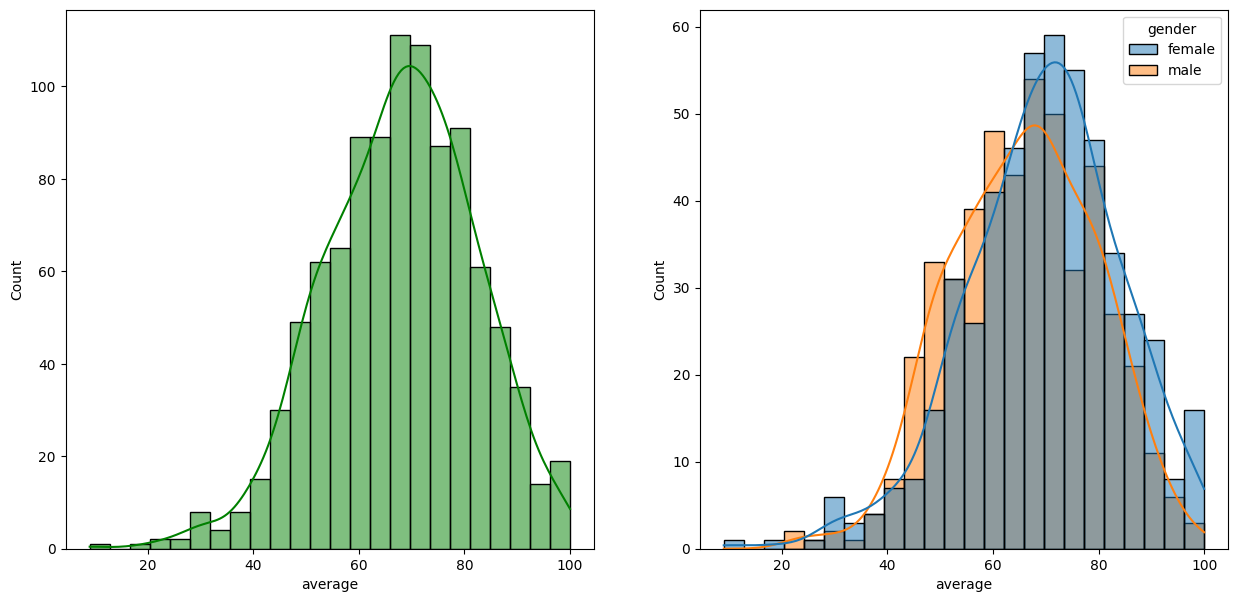

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',hue='gender',kde=True)
plt.show()